 # Titanic Survival Prediction

## Part 1 EDA

Note:I have combined the project part one and two and re-run the project so there could minor changes in accuracy percentage of 0.5 to 1%.

### Overview:
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

#### Variable Definition Key
survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd sex Sex Age Age in years
sibsp # of siblings / spouses aboard the Titanic
parch # of parents / children aboard the Titanic
ticket Ticket number
fare Passenger fare
cabin Cabin number
embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

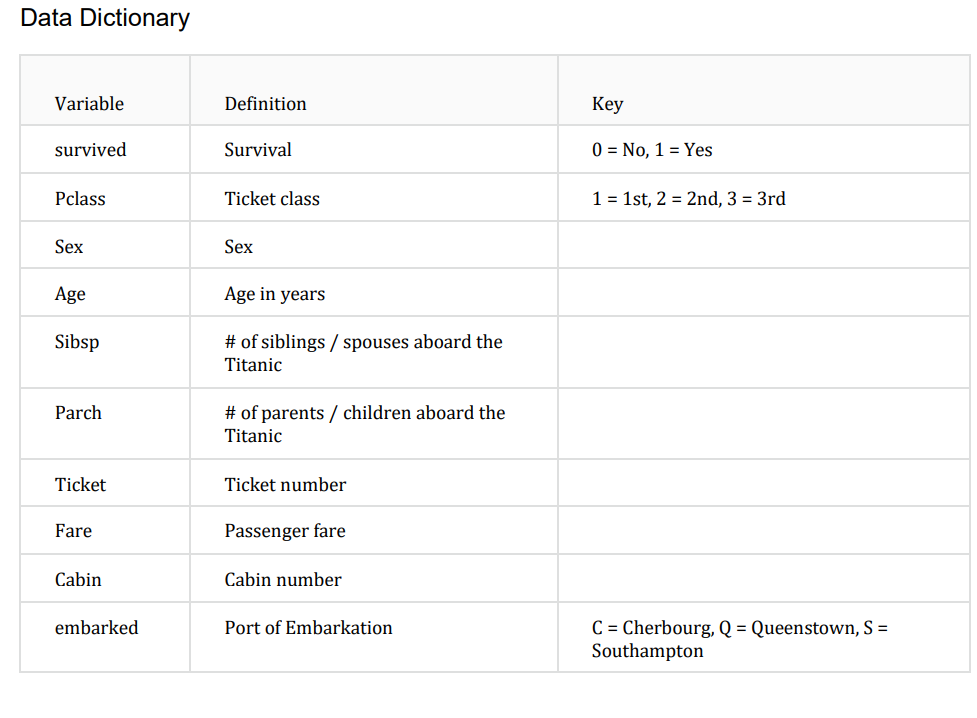

In [428]:
from IPython.display import Image
Image(filename='DataTable.PNG', height=340, width=900)


In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [430]:
eda = pd.read_csv('TITANIC.csv')

In [431]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 1: Variable Identification


In [432]:
eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [433]:
eda.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Step 2: Univariate Analysis


In [434]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [435]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
def plot_percentages(dataframe, by, sortbyindex=False):
    #plt.subplot(1, 2, 1)
    values = (dataframe[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('deep',16))
    ax.set_ylabel('Total % in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    #plt.subplot(1, 2, 2)
    grp = dataframe.groupby(['Survived',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.plot.bar(color=sns.color_palette('deep', 16))
    ax.set_ylabel('% Survived', fontsize=16)
    showLabels(ax)

In [436]:
eda.PassengerId.head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

This column clearly is a sequential Id assigned to the passenger. This wont be of any significance in predicting the survival. We will later remove this column from analysis.

#### Feature: Survived

This is the dependent variable which needs to be predicted.

In [437]:
print(eda.Survived.value_counts())
### Checking the Survival Rate
survival_rate = round((sum(eda[eda['Survived']==1]['Survived'])/len(eda['Survived'].index))*100,2)
print('Survival Rate : {}'.format(survival_rate))

0    549
1    342
Name: Survived, dtype: int64
Survival Rate : 38.38


In this training data we have 549 passangers who survived and 342 passangers who din't survive.
The training data ha a Survival Rate of 38.38%

<AxesSubplot:xlabel='Pclass', ylabel='count'>

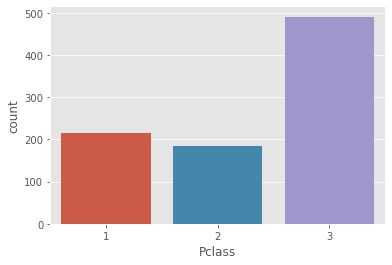

In [438]:
sns.countplot(x='Pclass', data=eda)

Feature: Name

This column has the names of all the passangers onboard.

In [439]:
print('Number of unique Passangers: {} '.format(len(eda.Name.unique())))
eda.Name.head()

Number of unique Passangers: 891 


0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Considering Name as primary Key. We see that there are no duplicate records in the data set and all passangers have a unique name.
We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [440]:
eda.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Don           1
Capt          1
Countess      1
Jonkheer      1
Sir           1
Mme           1
Ms            1
Name: Name, dtype: int64

In [441]:
def extract_createTitle(df,column):
    '''This function returns the list of titles from the passangers Name'''
    dataset = df
    #titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    # extract titles
    dataset['Title'] = dataset[column].str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    return dataset['Title']
    # convert titles into numbers
    #dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    #dataset['Title'] = dataset['Title'].fillna(0)

In [442]:
eda['Title'] = extract_createTitle(eda,'Name')

In [443]:
eda.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

Feature: Sex
    
This column information about the sex of the passanger, Male or Female

<AxesSubplot:xlabel='Sex', ylabel='count'>

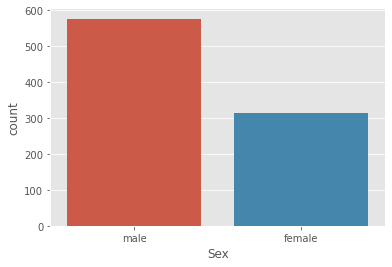

In [444]:
sns.countplot(x='Sex', data=eda)


#### Feature: Age
    
This column information about the Age of the passanger.

Mean Age : 29.69911764705882


c:\users\sanjay n t\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


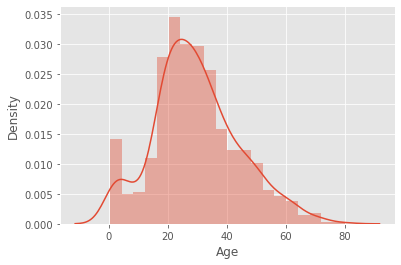

In [445]:
sns.distplot(eda.Age)
print('Mean Age : {}'.format(eda.Age.mean()))

In [446]:
eda.groupby('Survived').Age.mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Overall the average age of passangers onboard was 29.5.

Mean age of passanger who survived was 28.3.

Mean age of passangers who did not survive was 30.26.

#### Feature: SibSp
    
The dataset defines family relations in this way... Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

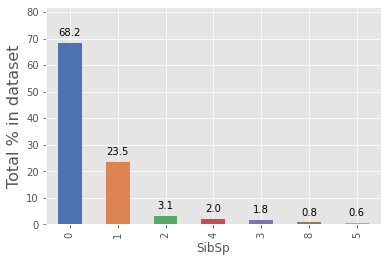

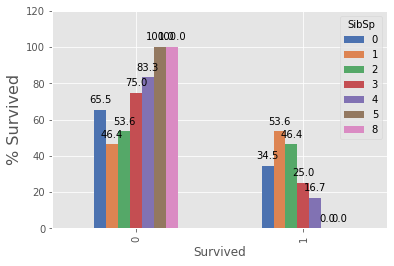

In [447]:
plot_percentages(eda,'SibSp')

68% passangers did not have any Siblings or Spouse

Passangers having 1 Sibling or 1 spouse had greated chances of survival. 53.6% of such passangers survived.

#### Feature: Parch
    
The dataset defines family relations in this way... Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

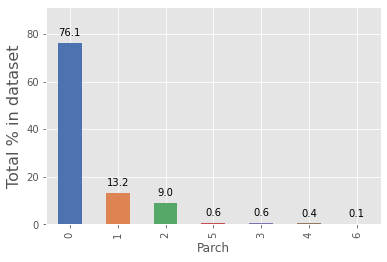

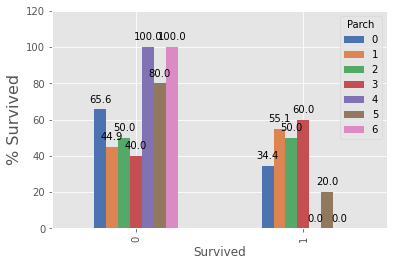

In [448]:
plot_percentages(eda,'Parch')

76.1% of the passangers did not have any parents/child onboard

If passangers survival rate is high when the number of parents/child onboard = 1

In [449]:
eda.loc[(eda['Parch'] == 0)  & (eda['SibSp'] == 0)]['Survived'].value_counts(normalize=True)

0    0.696462
1    0.303538
Name: Survived, dtype: float64

Passangers survival perventage is very small if the passanger was travelling alone i.e without any Sibling, Spouce, Parent or Child.

#### Feature: Ticket
Ticket number

In [450]:
eda.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [451]:
# How many unique Ticket are there 
print('There are {} Unique Tickets values for the passangers'.format(len(eda.Ticket.unique())))

There are 681 Unique Tickets values for the passangers


#### Feature: Fare
Passenger fare

c:\users\sanjay n t\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


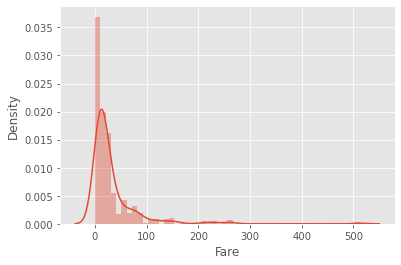

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [452]:
sns.distplot(eda.Fare)
plt.show()
eda.Fare.describe()

Fare is a continuos variable. Let's cut the Fare into discreate fare ranges or Bins for easier interpretation.

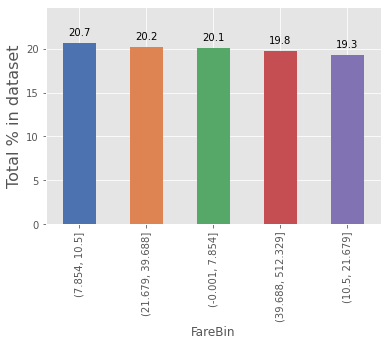

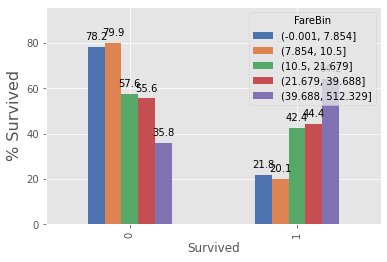

In [453]:
# Creating a new column to store the Fare range for each passanger
eda['FareBin']=pd.qcut(eda.Fare,q=5)
plot_percentages(eda,'FareBin')

It can be obeserved that the Fare has some positive correlation with the survival of the passanger.
The chances of survival of a passanger are improving as the fare is increasing.

#### Feature: Cabin
Passenger Cabin number. This column was dropped earlier from the analysis as 77 of the Canin entries were empty/Null.

#### Feature: Embarked
Passenger port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [454]:
eda.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

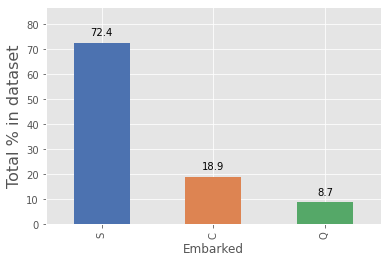

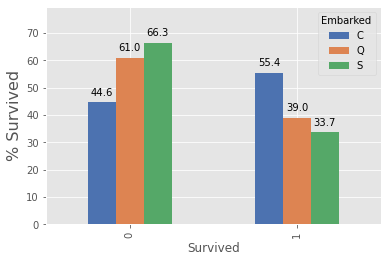

In [455]:
plot_percentages(eda,'Embarked')

Most of the passangers, around 72.5% embarked from S=Southampton port.
Survived %

55.4% passangers survived who embarked from Cherbourg
  
39% passangers survived who embarked from Queenstown

33.9% passangers survived who embarked from Southhampton port

### Step 3:Bivariate Analysis

#### Pclass and Sex

In [456]:
eda.groupby(['Pclass','Sex']).Survived.value_counts(normalize=False)

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

We already saw that the % of females survivers were way too high 74%.

Among the survived most of them travelled either 1st Class or 2nd Class.

#### Age and Sex

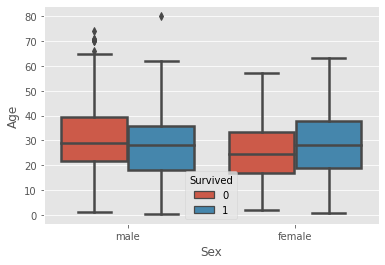

In [457]:
ax = sns.boxplot(x="Sex", y="Age", hue="Survived",data=eda, linewidth=2.5)

In [458]:
eda.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(-0.001, 7.854]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(39.688, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(7.854, 10.5]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(39.688, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(7.854, 10.5]"


### Step 4: Missing Values Treatment


In [459]:
eda.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareBin
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [460]:
eda.isnull().values.any()


True

In [461]:
eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Title        891 non-null    object  
 13  FareBin      891 non-null    category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 91.7+ KB


In [462]:
eda.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [463]:
eda.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
FareBin          0
dtype: int64

#### Handeling Missing Values
From above we observe missing values for some features
Let's check.

In [464]:
# Checking the null percentage of missing data
missing_per = round(eda.isnull().sum()/len(eda)*100,2)
missing_per[missing_per != 0]

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64

Out of the 891 train records, 20% of the data has no Age for the passangers and 77% of data with missing cabin information. Also 2 records dont have the Embarked port name.
Let's handel these missing data

In [465]:
missing_count=eda.isnull().sum()
missing_count[missing_count >0.0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [466]:
# Handling the missing Embarked port
eda[eda.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FareBin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,"(39.688, 512.329]"
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,"(39.688, 512.329]"


Since, both these persons dont have any siblings / spouses/ parents or children. We cannot infer there Port of Embarkment.Now we can,

impute the missing value with the mode of Embarked port.
remove these two records from analysis and modeling
Going with the first option, imput the missing port of embarkment with the mode i.e S: 644

In [467]:
eda['Embarked'].fillna('S',inplace=True)
eda['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Handling the missing Age

In [468]:
eda[eda.Age.isnull()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [469]:
# Average age of passangers
print('Average Age of passangers : {}'.format(eda.Age.mean()))
# Mean age of passangers who survived vs the one who did not survived
eda.groupby('Survived').Age.mean()

Average Age of passangers : 29.69911764705882


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Out of the 177 missing Age values there are 125 records who did not survive.
Overall the average age of passangers is 29.69 while the average among those who survived(1) is 28.3 and average age among non-survivors is 30.62.

1.One way is that we replace the null Age's with the mean of the passangers. However Age can be potential predictor of survival and hense imputing the 20% of data with mean value we may add significance bais to the model.

2.Another approach to impute can be to create a regression model to predict the missing age of passangers

3.Ignore these 177 records. This will lower the train data size but will avoid adding bias

We will impute the missing values with random integers lying between 1 standard deviation away from mean.

In [470]:
def imputeAge(df,column) :
    '''This function will impute the missing values with random integer value
    lying within 1 standard deviation of the mean'''
    dataset = df[:]
    mean = df[column].mean()
    std = df[column].std()
    is_null = dataset[column].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset[column].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset[column] = age_slice
    dataset[column] = df[column].astype(int)
#eda["Age"].isnull().sum()

In [471]:
imputeAge(eda,'Age')
eda["Age"].isnull().sum()

0

In [472]:
eda.Age.describe()

count    891.000000
mean      29.412088
std       13.505817
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

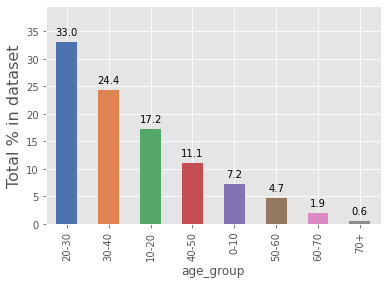

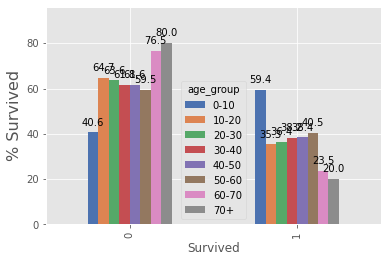

In [473]:
bins = [0,10,20,30,40,50,60,70,np.inf]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70+']
age_groups = pd.cut(eda.Age, bins, labels=labels)
eda['age_group'] = age_groups
plot_percentages(eda,'age_group')

Majority passangers on board, 33.8% fall in the age group of 20-30

59.5% of the children below the age of 10 years managed to survive. This further confirms that childern were evecuated first.

#### Handling the missing Cabin
There are 70% records with missing Cabin value. Since the percentage missing data is very high, it will be best if we ignore this feature by dropping the entire column from analysis.

In [474]:
eda.drop('Cabin',axis=1,inplace=True)
# Check missing value
eda.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
FareBin        0
age_group      0
dtype: int64

In [475]:
eda.isnull().values.any()

False

There are no more missing values in the train set. We can start Analysing the data in depth.

### Step 5 :Checking for Outliers

In [476]:
# Checking for outliers in the continuous variables
num_train = eda[['Age','Fare']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Fare
count,891.000000,891.000000
mean,29.412088,32.204208
std,13.505817,49.693429
min,0.420000,0.000000
25%,21.000000,7.910400
50%,28.000000,14.454200
75%,37.000000,31.000000
90%,47.000000,77.958300
95%,54.000000,112.079150
99%,65.000000,249.006220


Age of the passangers are gradually increasing suggesting no outliers in Age.

We see that the Fare jumps dramatically after 99 pecentile from 211.33 to 247.52. This suggest there are some outliers towards the end of the Fare distribution. Let's remove these outliers as the model is sensitive to outliers.

In [477]:
#fareMean=train.Fare.mean()
#fareSd=train.Fare.std()
#eda = eda[np.abs(eda['Fare']-fareMean) <= (3*fareSd)]
q = eda["Fare"].quantile(0.99)
train = eda[eda['Fare'] < q]

In [478]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
eda['Fare'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: Fare, dtype: float64

In [479]:
eda.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FareBin,age_group
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Step 6: Feature Engineering - Variable and Dummy Variable Creation


In [480]:
obj = eda.dtypes == np.object
print(obj)


PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Embarked        True
Title           True
FareBin        False
age_group      False
dtype: bool


In [481]:
eda.columns[obj]


Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Title'], dtype='object')

#### Removing variables irrelevent for predicting Survival

In [482]:
nonPredicter=['PassengerId','Name','Ticket']
eda.drop(nonPredicter,axis=1,inplace=True)

#### Handeling Categorical Variables

In [483]:
sexdic={'male': 0 , 'female': 1}
eda['Sex'] = eda['Sex'].map(sexdic)

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [484]:
eda.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FareBin', 'age_group'],
      dtype='object')

In [485]:
dummy = pd.get_dummies(eda[['Embarked','Title','age_group','FareBin']], drop_first=True)
# Adding the results to the master dataframe
eda = pd.concat([eda, dummy], axis=1)

In [486]:
eda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBin,...,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.679]","FareBin_(21.679, 39.688]","FareBin_(39.688, 512.329]"
0,0,3,0,22.0,1,0,7.2500,S,Mr,"(-0.001, 7.854]",...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,71.2833,C,Mrs,"(39.688, 512.329]",...,0,1,0,0,0,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,S,Miss,"(7.854, 10.5]",...,1,0,0,0,0,0,1,0,0,0
3,1,1,1,35.0,1,0,53.1000,S,Mrs,"(39.688, 512.329]",...,0,1,0,0,0,0,0,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,Mr,"(7.854, 10.5]",...,0,1,0,0,0,0,1,0,0,0


In [487]:
# We have created dummies for the below variables, so we can drop them
eda = eda.drop(['Embarked','Title','Age','age_group','FareBin'], 1)

In [488]:
#Exporting the cleaned Dataset for Model Training
eda.to_csv("Cleaned_Titanic_Data.csv")

#### END of part One EDA for Titanic Dataset

# Modelling 

## Titanic Passanger Survival Analysis

In [489]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

In [490]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Models Implemente 

1.Linear Regression <br>
2.LogisticRegression <br>
3.K-nearest neighbors algorithm<br>
4.Decision Tree<br>
5.Random Forest Classification<br>
6.KMeans Algorithm<br>
7.Hierarchical clustering<br>

##### Note : Necessary Modules are imported as and when necessary at Model development 

Reading the cleaned Dataset

In [491]:
Data = pd.read_csv('Cleaned_Titanic_Data.csv')
Data.shape

(891, 24)

In [492]:
Data.head()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,...,age_group_20-30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60-70,age_group_70+,"FareBin_(7.854, 10.5]","FareBin_(10.5, 21.679]","FareBin_(21.679, 39.688]","FareBin_(39.688, 512.329]"
0,0,0,3,0,1,0,7.2500,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,71.2833,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,1,3,1,0,0,7.9250,0,1,1,...,1,0,0,0,0,0,1,0,0,0
3,3,1,1,1,1,0,53.1000,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,4,0,3,0,0,0,8.0500,0,1,0,...,0,1,0,0,0,0,1,0,0,0


### Defining X & y

In [493]:
X = Data.iloc[:,2:].values
y = Data.iloc[:,1].values

In [494]:
X

array([[3., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [3., 1., 0., ..., 0., 0., 0.],
       ...,
       [3., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [495]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [496]:
X.shape

(891, 22)

In [497]:
y.shape

(891,)

### Splitting the data in Training and Test set

In [498]:
from sklearn.model_selection import train_test_split

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [500]:
X_train.shape

(623, 22)

In [501]:
X_test.shape

(268, 22)

In [502]:
y_train.shape

(623,)

In [503]:
y_test.shape

(268,)

## Linear Regression

linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression

Note: Here we using Multiple Linear Regression

In [504]:
from sklearn.linear_model import LinearRegression

In [505]:
lm = LinearRegression()

In [508]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

In [509]:
# print the intercept
print(lm.intercept_)

1.140036484044207


In [510]:
# print the intercept
print(lm.intercept_)

1.140036484044207


In [511]:
print(lm.coef_)   

[-0.1238392   0.54031099 -0.07878098 -0.05270101  0.00041044 -0.00906638
 -0.06622301 -0.56815664 -0.57289136 -0.46887965 -0.48767317 -0.0421035
 -0.04133589 -0.00736076 -0.1173406  -0.16395029 -0.26812456 -0.13925606
  0.00686497  0.01134952  0.03359993  0.04667929]


#### Predictions

In [512]:
# Making predictions using the model
y_pred = lm.predict(X_test)

In [513]:
y_pred

array([ 0.20555049,  0.09116742,  0.43718144,  1.10830349,  0.71081925,
        0.38186524,  1.0244336 ,  0.92371226,  0.40725047,  0.83555659,
        0.0125113 ,  0.80761385,  0.14840614,  0.73726128,  1.02782615,
        0.63557039,  0.09871988,  0.12834167,  0.13221274,  0.72617841,
        0.22720975,  0.98967351,  0.14840101,  0.41604559,  0.64401698,
        1.05066872,  0.13214945,  0.63629522,  0.84780077,  0.37775635,
        0.19868714,  0.69212338,  0.09883275,  0.38391742,  0.0121795 ,
        0.56728157,  0.01471124,  0.22308238,  0.22859301,  0.19160724,
        0.22705942,  0.15725704,  0.10536947, -0.23063482,  1.01620426,
        0.09817433,  0.13214945,  0.83765143,  0.26256814,  0.16102111,
        0.38089242,  0.42195281,  0.70984739,  0.09740672,  0.4477599 ,
        0.13119216,  0.15345535,  0.25825709,  0.405602  ,  0.03080586,
        0.15725877,  0.54158673,  0.82442309,  0.5362738 ,  0.64290833,
        0.18238127,  0.9295137 ,  0.29156931,  0.7110787 ,  0.92

In [514]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

#### Model Performance Metrics
#### Coefficient of Determination (R square)

In [515]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [516]:
from math import sqrt
rmse = sqrt(mse)

In [517]:
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.1328834372241136
Root_Mean_Squared_Error : 0.3645318055041475
r_square_value : 0.4318916669532895


Adjusted R square

In [518]:
AdjustedR= (1 - ((1-r_squared)*890)/(891-22-1))
AdjustedR

0.41749260782076913

#### Note : Liner Regression has a accuracy of 43.2%

## LogisticRegression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.)

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable has only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

In [519]:
# importing model
from sklearn.linear_model import LogisticRegression

In [520]:
#Fitting the model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

c:\users\sanjay n t\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [521]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [522]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

#### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [523]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[141  27]
 [ 24  76]]


#### Terminology:
True Positive (TP): We correctly predicted the Actual Positive Data <br>

True Negative (TN): We correctly predicted the Actual Negative Data  <br>

False Positive (FP): We incorrectly predicted the Actual Negative Data as Positive (Type I Error)  <br>

False Negative (FN): We incorrectly predicted the Actual Positive Data as Negative (Type II Error)  <br>

In [524]:
TN = confusion [0,0]
FP = confusion [0,1]
FN = confusion [1,0]
TP = confusion [1,1]
print(confusion)
print ("TN: ", TN)
print ("FP: ", FP)
print ("FN: ", FN)
print ("TP: ", TP)

[[141  27]
 [ 24  76]]
TN:  141
FP:  27
FN:  24
TP:  76


In [525]:
confusion_matrix = pd.DataFrame(confusion)
confusion_matrix.columns = ['Predicted No Subscription', 'Predicted Yes Subscription']
confusion_matrix = confusion_matrix.rename(index = {0 : 'Actual No Subscription', 1 : 'Actual Yes Subscription'})
confusion_matrix

,Predicted No Subscription,Predicted Yes Subscription
Actual No Subscription,141,27
Actual Yes Subscription,24,76


#### Confusion Matrix Evaluation Metrics

In [526]:
from sklearn import metrics
accuracy_LR = metrics.accuracy_score(y_test, y_pred)
accuracy1_LR = (TN+TP)/(TN+TP+FN+FP)
print ("Accuracy from metrics: ", accuracy_LR)
print ("Accuracy Calculated: ", accuracy1_LR)

Accuracy from metrics:  0.8097014925373134
Accuracy Calculated:  0.8097014925373134


In [527]:
print ((FP+FN)/float(TP+TN+FP+FN))
print (round(1-metrics.accuracy_score(y_test, y_pred),4))

0.19029850746268656
0.1903


In [528]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy_LR = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [529]:
print('Accuracy is  :' ,round(accuracy_LR,2)*100)
print('F1 score is :' ,round(f1,2)*100)
print('Precision is  :',round(precision,2)*100)
print('Recall is  :',round(recall,4)*100)
print('Roc Auc is  :',round(roc_auc,2)*100)

Accuracy is  : 81.0
F1 score is : 75.0
Precision is  : 74.0
Recall is  : 76.0
Roc Auc is  : 80.0


In [530]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       168
           1       0.74      0.76      0.75       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



### Note : Logistic Regression has a accuracy of 80.0 - 81%

### k-nearest neighbors algorithm

The k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

The k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [531]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [532]:
np.set_printoptions(suppress=True)

In [533]:
X_train

array([[-1.5325562 , -0.72592065, -0.457246  , ..., -0.49095403,
         1.98606255, -0.51849697],
       [-1.5325562 ,  1.37756104,  0.4033711 , ..., -0.49095403,
        -0.50350881,  1.92865159],
       [ 0.84844757, -0.72592065,  3.8458395 , ..., -0.49095403,
        -0.50350881,  1.92865159],
       ...,
       [ 0.84844757, -0.72592065, -0.457246  , ..., -0.49095403,
        -0.50350881, -0.51849697],
       [ 0.84844757,  1.37756104,  0.4033711 , ...,  2.03685059,
        -0.50350881, -0.51849697],
       [-0.34205431, -0.72592065,  0.4033711 , ..., -0.49095403,
         1.98606255, -0.51849697]])

In [534]:
X_test

array([[ 0.84844757, -0.72592065, -0.457246  , ...,  2.03685059,
        -0.50350881, -0.51849697],
       [ 0.84844757, -0.72592065, -0.457246  , ..., -0.49095403,
        -0.50350881, -0.51849697],
       [ 0.84844757, -0.72592065,  2.9852224 , ..., -0.49095403,
         1.98606255, -0.51849697],
       ...,
       [ 0.84844757, -0.72592065,  0.4033711 , ...,  2.03685059,
        -0.50350881, -0.51849697],
       [ 0.84844757,  1.37756104, -0.457246  , ..., -0.49095403,
        -0.50350881, -0.51849697],
       [-1.5325562 , -0.72592065, -0.457246  , ..., -0.49095403,
         1.98606255, -0.51849697]])

In [535]:
error = []
accuracy = []
# Calculating error for K values between 1 and 40
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

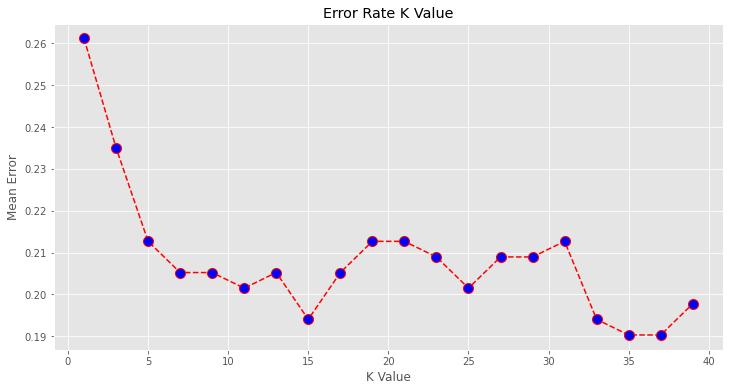

In [536]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

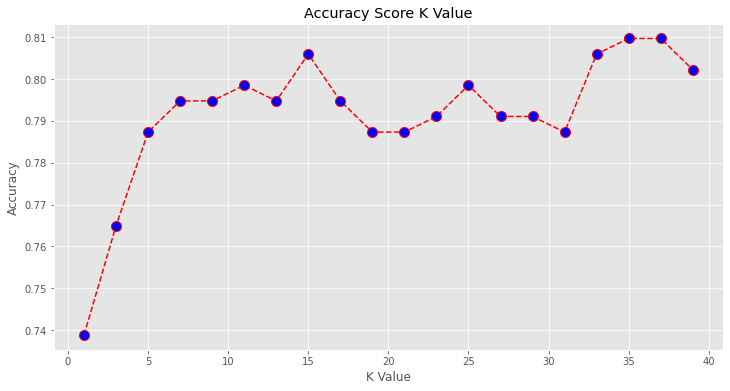

In [537]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In KNN, finding the value of k is not easy. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data scientists usually select k=sqrt(n)

In [538]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [539]:
y_pred1 = knn.predict(X_test)

In [540]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[144,  24],
       [ 33,  67]], dtype=int64)

In [541]:
acc_KNN = accuracy_score(y_test, y_pred1)
acc_KNN

0.7873134328358209

### Note: KNN has a accuracy of 75 - 78%

### DECISION TREE ALGORITHM

Decision Tree learning <br>
Decision Tree algorithm belongs to the family of supervised learning algorithms <br>
It is one of the most widely used practical methods for inference over supervised data.<br>
Decision tree algorithm can be used for solving both regression as well as classification problems <br>
A decision tree represents a procedure for classifying categorical data based on their attributes <br>
The construction of decision tree does not require any domain knowledge or parameter setting , and therefore appropriate for exploratory knowledge discovery. <br>
Their representation of acquired knowledge in tree form is intuitive and easy toassimilate by humans
<br>

In [542]:
from sklearn.tree import DecisionTreeClassifier 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
, random_state=1) # 70% training and 30% test

In [543]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [544]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[132,  21],
       [ 46,  69]], dtype=int64)

In [545]:
acc_Des = round(metrics.accuracy_score(y_test, y_pred)*100,2),
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2),
"%")

Accuracy: 75.0 %


### Note: The Decision Tree Algorithm has a accuracy of 76%

### Random Forest Classification

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees.Random decision forests correct for decision trees' habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

In [546]:
from sklearn.ensemble import RandomForestClassifier
# Creating a RAndom Forest Classifier
clf = RandomForestClassifier(n_estimators = 700 , n_jobs= 2, random_state
= 0)
# Training the Classifier
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=700, n_jobs=2, random_state=0)

In [547]:
y_pred = clf.predict(X_test)


In [548]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0], dtype=int64)

In [549]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [550]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[128,  25],
       [ 38,  77]], dtype=int64)

In [551]:
acc_Ran = metrics.accuracy_score(y_test, y_pred)
acc_Ran

0.7649253731343284

In [552]:
pd.crosstab(y_test, y_pred, rownames = ['Actual Status'], colnames = [
'Predicted Status'])

Predicted Status,0,1
Actual Status,,
0,128,25
1,38,77


### Note: Random Forest has a accuracy of 76.4%

### KMEANS ALGORITHM

Unsupervised ML Algorithm Centroid-type Clustering (type: hard/soft, methods: connectivity, centroid, distribution, density) Similiarity Metric Exploratory Data Analysis Applications: ML, pattern recognition, image analysis, information retrieval, bio-informatics, compression, graphics

In [553]:
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [554]:
X = Data.iloc[:,:].values

In [555]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [556]:
np.set_printoptions(suppress = True)

In [557]:
X

array([[-1.73010796, -0.78927234,  0.82737724, ..., -0.48910238,
        -0.50315461, -0.49613894],
       [-1.72622007,  1.2669898 , -1.56610693, ..., -0.48910238,
        -0.50315461,  2.01556444],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.48910238,
        -0.50315461, -0.49613894],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ..., -0.48910238,
         1.98746069, -0.49613894],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.48910238,
         1.98746069, -0.49613894],
       [ 1.73010796, -0.78927234,  0.82737724, ..., -0.48910238,
        -0.50315461, -0.49613894]])

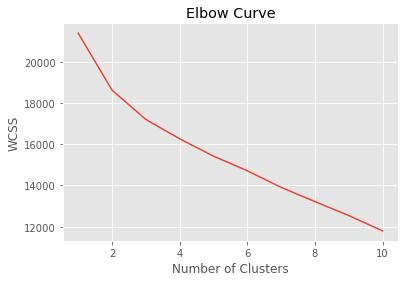

In [558]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init
            =10, random_state=0)
    kmean.fit(X)
    wcss.append(kmean.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [559]:
kmean = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10,
random_state=0)
y_kmean_clustering = kmean.fit_predict(X)

In [560]:
y_kmean_clustering

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [561]:
X = np.array(Data.drop(['Survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(Data['Survived'])

In [562]:
X = np.array(Data.drop(['Survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(Data['Survived'])

clf = KMeans(n_clusters=2, max_iter =300, algorithm = 'auto')
clf.fit(X)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
acc_Kmean = (correct/len(X))*100
print(correct/len(X))

0.22783389450056116


### Hierarchical clustering

In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram.

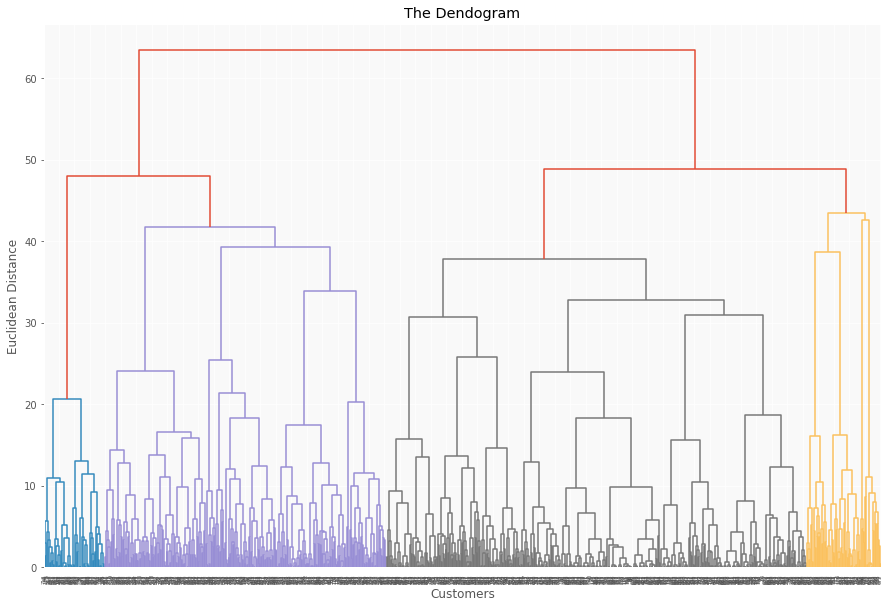

In [563]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(15, 10)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))
plt.title('The Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [564]:
# Fitting the model
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_clustering = hcluster.fit_predict(X)

In [565]:
y_clustering

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

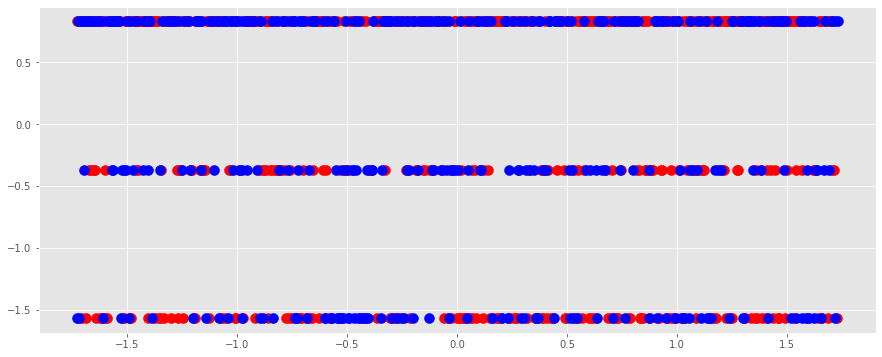

In [566]:
# Visualizing Results
plt.figure(figsize=(15,6))
plt.scatter(X[y_clustering==0, 0], X[y_clustering==0, 1], s=100, c='red', label = 'Cluster A')
plt.scatter(X[y_clustering==1, 0], X[y_clustering==1, 1], s=100, c='blue', label = 'Cluster B')

## Final Prediction

### Logistic Regression has highest accuracy of 80.0% compared to others Hence right now,It is the best Model for Titanic Survival prediction